In [1]:
__nbid__ = '0029'
__author__  = 'Stephanie Juneau <stephanie.juneau@noirlab.edu>, Robert Nikutta <robert.nikutta@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>, Astro Data Lab Team <datalab@noirlab.edu>'
__version__ = '20251205' # aaaammdd
__datasets__ = ['des_dr1']
__keywords__ = ['galaxies', 'object classification', 'plot:color-color', 'stars']

# Clasificación de estrellas/galaxias/QSO en el Dark Energy Survey (DES)
por Stéphanie Juneau, Knut Olsen, Robert Nikutta y el equipo de Astro Data Lab

#### (_Traducción de [StarGalQsoDESDR1.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/StarGalQSOSeparation/StarGalQsoDESDR1.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen](#goals)
* [Avisos Legales y atribuciones](#attribution)
* [Introducción](#introduction)
* [Importaciones y configuración](#import)
* [Autenticación](#auth)
* [Consulta catálogo de fotometría DES](#query)
* [Resultados de la trama](#plots)
* [Apéndice: comparación con la clasificación del DES Team](#compare)
* [Apéndice: comparación de <tt>class_star</tt>](#classstar)
* [Referencias](#resources)

<a class="anchor" id="goals"></a>
# Objetivos
* Investigar colores ópticos e infrarrojos de los catálogos DES.
* Clasificar objetos que probablemente sean estrellas o galaxias.

# Resumen
En este notebook, investigamos los colores ópticos de fuentes astronómicas detectadas en el [Dark Energy Survey (DES)](https://www.darkenergysurvey.org/), un survey de imágenes realizado con la Cámara de Energía Oscura (Dark Energy Camera, o DECam) en el telescopio Blanco de 4 metros. La primera publicación de datos, DR1, comprende ~400 millones de estrellas, galaxias y cuásares (o QSO: objetos cuasi estelares).

Productos y servicios de Astro Data Lab utilizados aquí:
<ul>
<li>La base de datos DES DR1</li>
<li>Servidor de notebooks Jupyter</li>
<li>Administrador de consultas (query manager)</li>
</ul>

A continuación, consultamos la base de datos, calculamos colores, graficamos algunas combinaciones de colores y tomamos en cuenta las formas de origen definidas a partir de la dispersión de los perfiles de luz y un clasificador de estrellas y galaxias precalculado, para diferenciar entre clases de objetos. En este notebook nos centramos en la separación estrella-galaxia y todavía no intentamos clasificar los QSO.

<a class="anchor" id="attribution"></a>

# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.


<a class="anchor" id="introduction"></a>
# Introducción

Un survey de imágenes incluye un zoológico de diferentes objetos astronómicos. Hay estrellas en primer plano de nuestra propia galaxia, la Vía Láctea, y galaxias en segundo plano a varias distancias, incluidas QSO con agujeros negros supermasivos en acreción activa. En este notebook, nuestro objetivo es distinguir entre clases de objetos utilizando combinaciones de colores y parámetros de forma.

Hay varias aplicaciones científicas posibles. Por ejemplo, se podrían seleccionar estrellas para estudiar poblaciones estelares de la Vía Láctea o buscar clases específicas de estrellas (Gigantes Rojas, etc.). Alternativamente, se pueden seleccionar galaxias para abordar cuestiones sobre la evolución galáctica o para investigar su organización espacial en estructuras a gran escala. A continuación, exploramos posibles clasificaciones, comparamos los resultados de diferentes bandas/filtros y hacemos referencia a ejemplos de clasificaciones sugeridas por el equipo de DES.

## Magnitudes y colores

Las magnitudes se obtienen a través de un conjunto de filtros similar al conjunto *u,g,r,i,z* utilizado para SDSS. En este trabajo utilizamos *g,r,z* de DECam

Los colores se definen como una diferencia entre magnitudes en dos bandas. Un color "más rojo" significa que el objeto es comparativamente más brillante en la banda más roja (es decir, de longitud de onda más larga). Por el contrario, un color "más azul" significa que el objeto es comparativamente más brillante en la banda más azul (es decir, de longitud de onda más corta).

Usaremos los siguientes colores:
* *g-r*
* *r-z*

## Formas/tipos de objetos

La forma del objeto (perfil de luz 2D) se puede definir con un tamaño y elipticidad. En este notebook, estamos interesados ​​en utilizar la extensión de las imágenes para distinguir entre estrellas (fuentes puntuales), galaxias (resueltas, si no demasiado distantes) y QSO (que pueden tener componentes tanto puntuales como resueltos).

* `kron_radius`: Radio de Kron en píxeles
* `spread_model_X`: clasificador de estrellas y galaxias que compara el modelo extendido con el modelo PSF. El valor se da para cada banda X = *g, r, i, z, y*
* `class_star_X`: valor que oscila entre 0,0 (no puntual) y 1,0 (puntual), para cada banda X = *g, r, i, z, y*

El valor de `spread_model` es cercano a cero para una fuente puntual (estrella o QSO), positivo para una fuente extendida (galaxia), negativo para un artefacto más pequeño que el PSF (por ejemplo, un píxel defectuoso o un rayo cósmico). Se puede encontrar más información sobre el `spread_model` en [Desai et al (2012)](https://ui.adsabs.harvard.edu/abs/2012ApJ...757...83D), y [Soumagnac et al (2015)](https://ui.adsabs.harvard.edu/abs/2015MNRAS.450..666S).

<a class="anchor" id="import"></a>
# Importaciones y configuración

In [1]:
# De terceros
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from getpass import getpass

# De DataLab
from dl import queryClient as qc, storeClient as sc
from dl.helpers.utils import convert

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="query"></a>
# Consulta catálogo de fotometría DES

La fotometría se deriva del modelado de fuentes de SourceExtractor, y la base de datos incluye fotometría del modelo, tipo (forma), así como fotometría de apertura en varios tamaños de apertura. En este trabajo, utilizaremos magnitudes de apertura adaptativas de SourceExtractor (MAG_AUTO).

La base de datos se llama **des_dr1** e incluye varias tablas. Usaremos la tabla **main** (principal). Los nombres y descripciones de las columnas se pueden encontrar en la [Interfaz de consulta del DataLab](https://datalab.noirlab.edu/query.php) o utilizando el servicio del Protocolo de acceso a tablas (TAP) con, por ejemplo, TOPCAT. En ambos casos, nos interesa **des_dr1.main**.

In [2]:
# Escribir declaración de consulta (sql) como una cadena
# NOTA: las comillas triples nos permiten dividir la cadena en varias líneas
query = """
        SELECT mag_auto_g as gmag, mag_auto_r as rmag, mag_auto_z as zmag, 
               mag_auto_i as imag, mag_auto_y as ymag, 
               kron_radius, spread_model_g, class_star_g, spread_model_r, class_star_r, 
               spread_model_z, class_star_z, 
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (fluxerr_auto_g>0 and fluxerr_auto_r>0 and fluxerr_auto_z>0)
        LIMIT 300000
        """

# mag_auto_g,r,i,z,y = Magnitudes AB en bandas DECam g,r,i,z,y
# kron_radius = Radio Kron de SExtractor (píxeles)
# spread_model_g,r,z = clasificador de estrellas/galaxias que cuantifica el perfil de luz en relación con PSF
# class_star_g,r,z = clasificador de fuente estrella/extendido (de 0 a 1)
# snr_g,r,z = relaciones señal-ruido calculadas (S/N) en bandas g,r,z
# ra,dec = coordenadas celestes
#
# WHERE: requisito de que el error>0 (para evitar dividir por cero) en las bandas g,r,z
# LIMIT: devuelve 300.000 filas que satisfacen la consulta

print(query)


        SELECT mag_auto_g as gmag, mag_auto_r as rmag, mag_auto_z as zmag, 
               mag_auto_i as imag, mag_auto_y as ymag, 
               kron_radius, spread_model_g, class_star_g, spread_model_r, class_star_r, 
               spread_model_z, class_star_z, 
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (fluxerr_auto_g>0 and fluxerr_auto_r>0 and fluxerr_auto_z>0)
        LIMIT 300000
        


In [3]:
# Ejecute la consulta de forma sincrónica, si es corta (por ejemplo, LIMIT<=300,000)
# Luego convertimos el resultado devuelto, una cadena con formato CSV, en un marco de datos de Pandas.
# asegurándose de que cualquier valor potencial de 'Infinito' se convierta a NaN.
res = qc.query(sql=query)
df = convert(res,'pandas',na_values=('Infinity','-Infinity'))

In [4]:
# Imprima algunas filas del marco de datos del resultado
print(df[:5])
len(df)

        gmag       rmag       zmag       imag       ymag  kron_radius  \
0  20.928880  19.757921  19.085880  19.328814  19.115950     3.500000   
1  24.751804  23.078922  22.566732  22.573788  21.469976     4.062462   
2  25.610740  22.297592  21.609787  21.603043  21.055618     5.489732   
3  25.061615  23.208113  21.669064  22.576693  99.000000     5.531640   
4  22.804256  22.195381  21.046710  21.601774  21.652860     6.214763   

   spread_model_g  class_star_g  spread_model_r  class_star_r  spread_model_z  \
0        0.010547      0.026007        0.010532      0.035027        0.013138   
1       -0.016215      0.369982       -0.002856      0.616654       -0.008349   
2       -0.041010      0.354254        0.008723      0.280804        0.010593   
3       -0.037208      0.505072       -0.000666      0.565130        0.005110   
4       -0.041396      0.675215        0.013105      0.116435        0.013803   

   class_star_z      snr_g      snr_r      snr_z          ra        dec  


300000

<a class="anchor" id="plots"></a>
# Graficar resultados

## Diagrama óptico color-color

In [5]:
# Seleccione rango de interés
thres = 5.   # valor umbral para S/N (aquí, haciéndolo más estricto que la consulta)
keep = (df['snr_g']>thres)&(df['snr_r']>thres)&(df['snr_z']>thres)

# Colores
g_r   = df['gmag'][keep] - df['rmag'][keep]
r_z   = df['rmag'][keep] - df['zmag'][keep]

r_i   = df['rmag'][keep] - df['imag'][keep]
i_z   = df['imag'][keep] - df['zmag'][keep]
z_y   = df['zmag'][keep] - df['ymag'][keep]

print(f'Conde: {len(g_r)}')

Conde: 107861


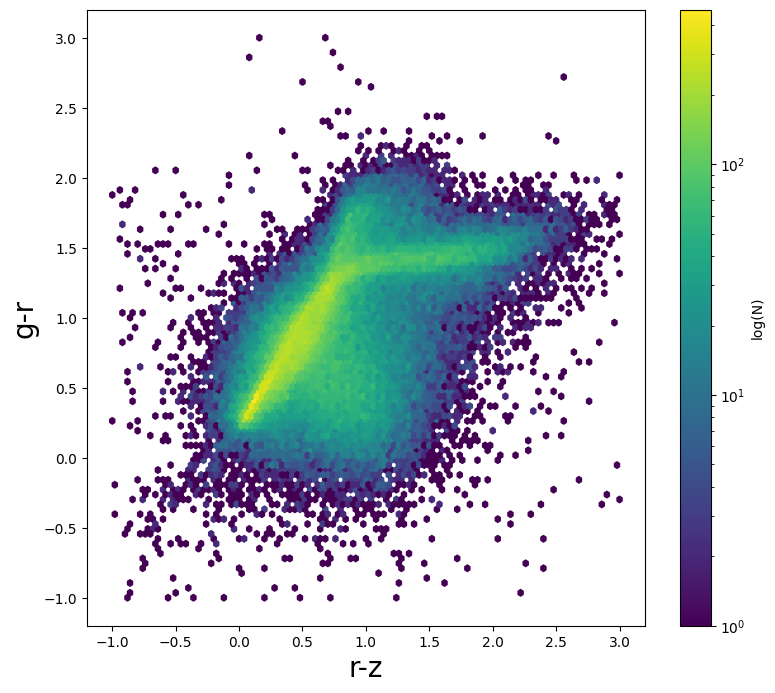

In [6]:
col0 = r_z   # color rz
col1 = g_r   # color g-r

# Histograma 2D de objetos
fig, ax1 = plt.subplots(1, 1, figsize=(9, 8))
im1 = ax1.hexbin(col0, col1, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1., 3, -1., 3))
ax1.set_xlabel('r-z',fontsize=20)
ax1.set_ylabel('g-r',fontsize=20)

# barra de colores
cb = plt.colorbar(im1,label='log(N)')

En la figura anterior, podemos ver la estructura en el mapa de densidad numérica, como dos ramas curvas que se cruzan o se superponen, junto con un grupo o nube de objetos más difuso. Volveremos a visitar este gráfico color-color más adelante después de clasificar los objetos en estrellas y galaxias. Esto ayudará a aislar las dos ramas.

## Parámetros morfológicos

En esta sección, creamos una serie de gráficos que combinan parámetros morfológicos como `spread_model`, `class_star` y `kron_radius` con magnitudes (en cada una de las bandas *g*, *r* y *z*). Los objetivos son determinar qué cantidades ayudan a clasificar los objetos en estrellas y galaxias, y comparar la consistencia y diferencias entre los resultados obtenidos con las distintas bandas.

In [7]:
def plot_morph(df,band='g'):
    """
    Gráficos en dos columnas x dos filas.
    """
    fig = plt.figure(figsize=(8*2,8*2))
    ax = fig.add_subplot(2,2,1)
    ax.hexbin(df[band+'mag'],df['spread_model_'+band],gridsize=200,bins='log',mincnt=1,extent=(12,26,-0.05,0.05))
    ax.set_xlabel(band,fontsize=20)
    ax.set_ylabel('spread_model_'+band,fontsize=20)
    ax.tick_params(labelsize=10)

    ax2 = fig.add_subplot(2,2,2)
    ax2.hexbin(df['kron_radius'],df['class_star_'+band],gridsize=200,bins='log',mincnt=1,extent=(0,10,0,1))
    ax2.set_xlabel('kron_radius',fontsize=20)
    ax2.set_ylabel('class_star_'+band,fontsize=20)
    ax2.tick_params(labelsize=10)

    ax3 = fig.add_subplot(2,2,3)
    ax3.hexbin(df[band+'mag'],df['class_star_'+band],gridsize=200,bins='log',mincnt=1,extent=(12,26,0,1))
    ax3.set_xlabel(band,fontsize=20)
    ax3.set_ylabel('class_star_'+band,fontsize=20)
    ax3.tick_params(labelsize=10)

    ax4 = fig.add_subplot(2,2,4)
    ax4.hexbin(df['spread_model_'+band],df['class_star_'+band],gridsize=200,bins='log',mincnt=1,extent=(-0.025,0.025,0,1))
    ax4.set_xlabel('spread_model_'+band,fontsize=20)
    ax4.set_ylabel('class_star_'+band,fontsize=20)
    ax4.tick_params(labelsize=10)

### Banda *g*

Primero, graficamos los resultados solo para la banda *g*, lo que requiere una relación señal-ruido > 5 en el filtro *g*.

Número de objetos con S/N > 5 y spread_model válido en banda g: 142397


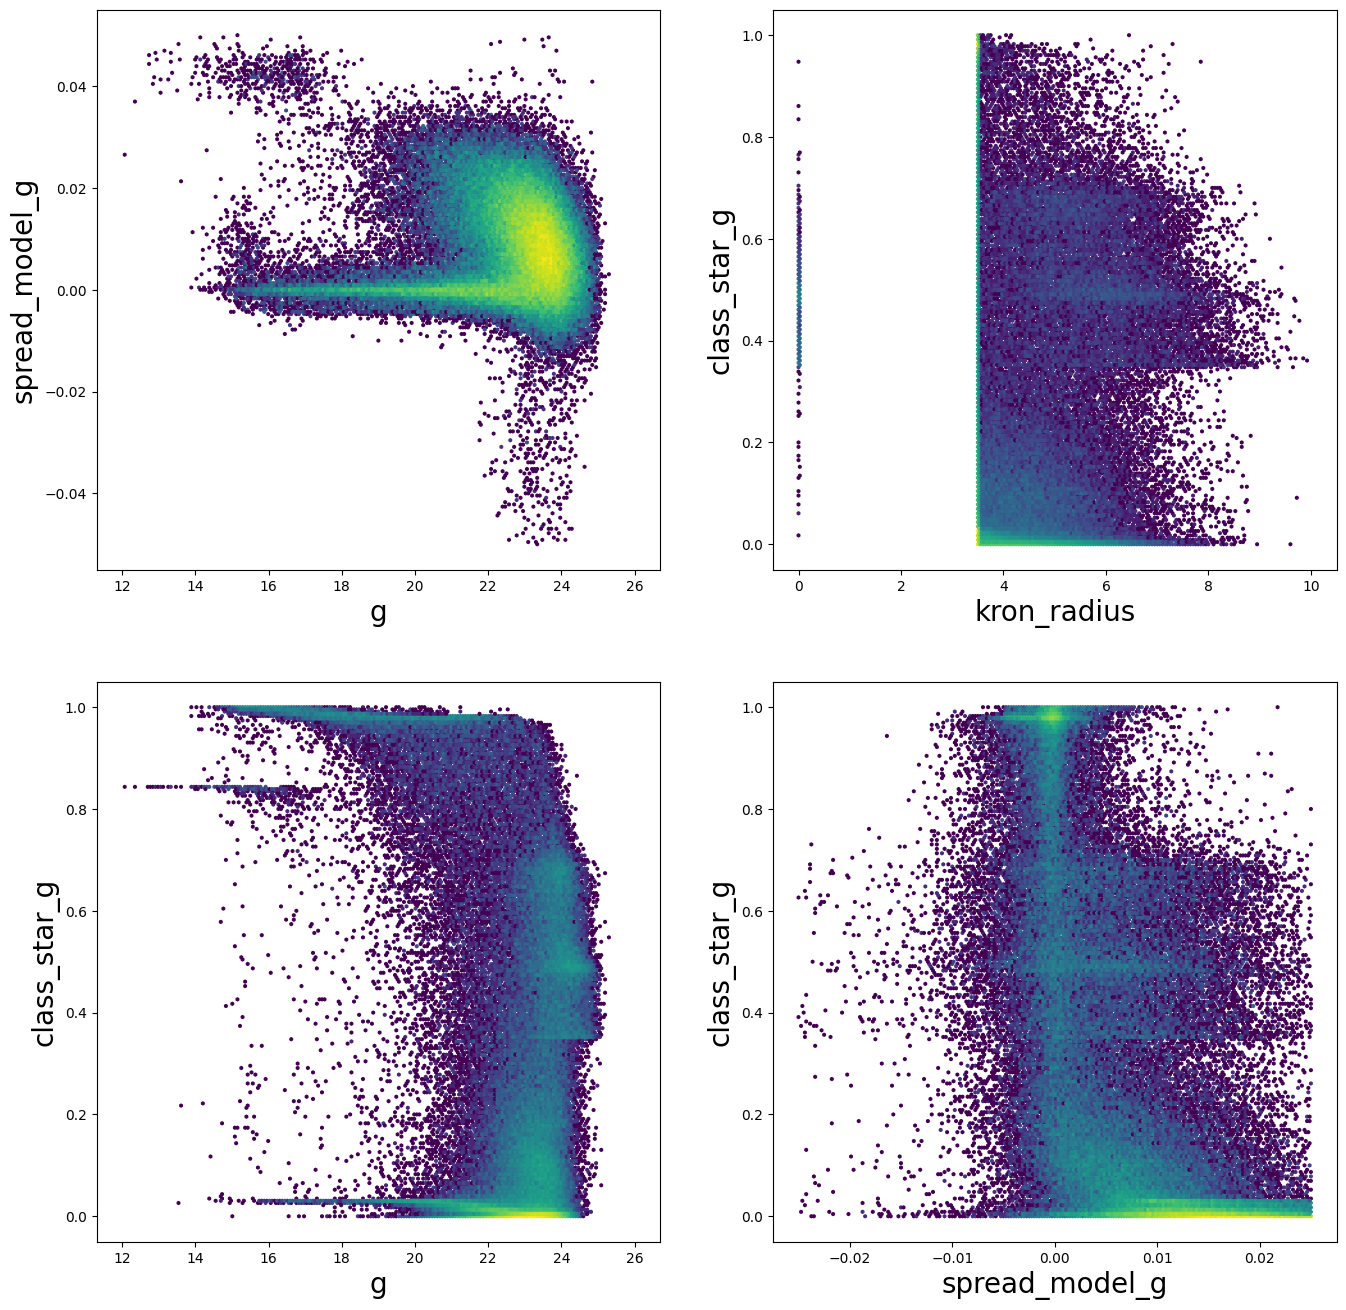

In [8]:
# Las magnitudes no válidas están configuradas en 99 -> mag_auto_X < 90
# spread_model_X es válido en abs(spread_model)<1
# Requiere S/N>5 en la banda g.
df_in=df[(df['gmag']<90) & (df['imag']<90) & (df['spread_model_g']>(-1)) & \
      (df['rmag']<90) & (df['zmag']<90) & (df['spread_model_g']<1) & \
      ((df['snr_g'])>5)]

print('Número de objetos con S/N > 5 y spread_model válido en banda g:',len(df_in))

plot_morph(df_in)

Como recordatorio, "spread_model" debe ser casi 0 para fuentes puntuales, positivo para fuentes extendidas y negativo para artefactos de datos más pequeños que el PSF. El panel superior izquierdo muestra claramente estrellas a lo largo de una secuencia horizontal alrededor de dispersión 0. Sin embargo, podemos ver que el otro grupo de puntos (presumiblemente galaxias) se unen y se superponen con las estrellas en magnitudes débiles que comienzan alrededor de *g*=23.

De manera similar, los valores de `class_star` varían de 0,0 (no puntual) a 1,0 (puntual). Por tanto, se esperaría que una clasificación segura fuera casi 0 para las estrellas y casi 1 para las galaxias resueltas. De hecho, los dos paneles de la fila inferior muestran dos ramas claras en valores bajos y altos. Sin embargo, también hay algunas estructuras en forma de crestas a lo largo de `class_star` con valores entre 0,3 y 0,7. Sospechamos que estos corresponden a mediciones de menor calidad. Veremos a continuación que estas crestas son menos prominentes en las bandas más rojas (en *r*, y particularmente en *z*), y que también desaparecen cuando se utilizan mediciones de la banda *g* de objetos con buenas detecciones en las 3 bandas.

### Banda *r*

En segundo lugar, graficamos los resultados solo para la banda *r*, lo que requiere una relación señal-ruido > 5 en el filtro *r*.

Número de objetos con S/N > 5 y spread_model válido en la banda r: 202081


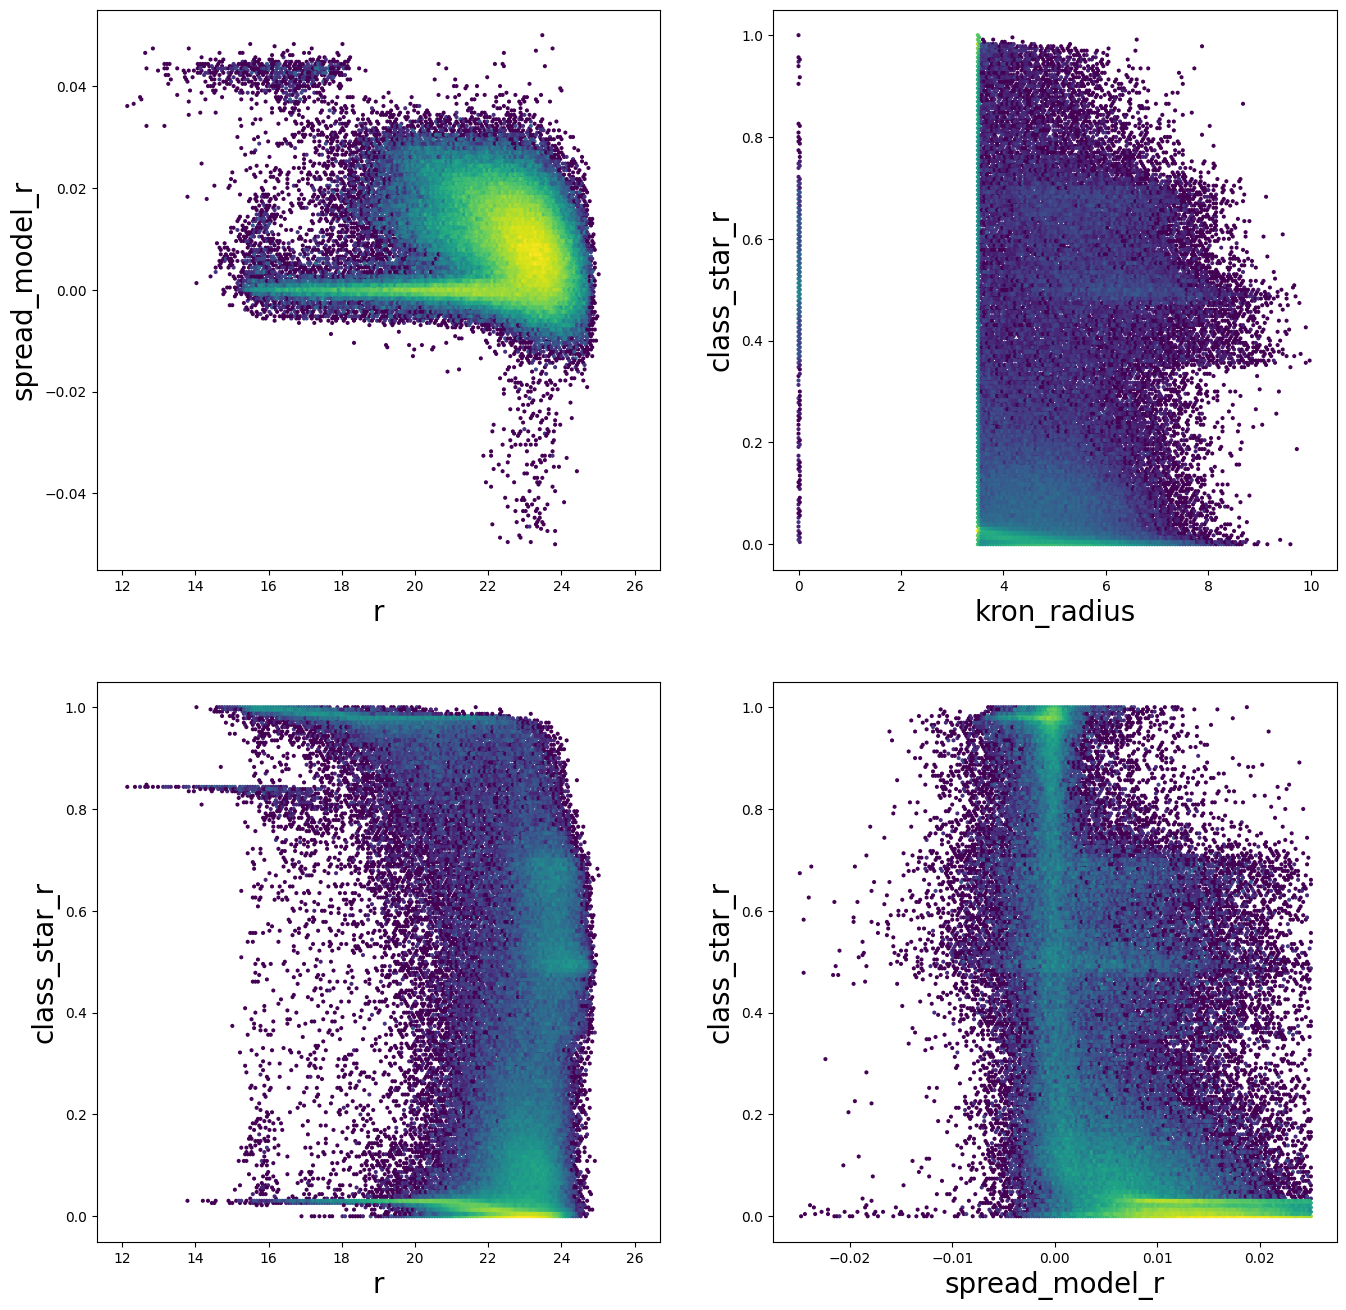

In [9]:
# Las magnitudes no válidas están configuradas en 99 -> mag_auto_X < 90
# spread_model_X es válido en abs(spread_model)<1
# Requiere S/N>5 en la banda r.
df_in=df[(df['gmag']<90) & (df['imag']<90) & (df['spread_model_r']>(-1)) & \
      (df['rmag']<90) & (df['zmag']<90) & (df['spread_model_r']<1) & \
      ((df['snr_r'])>5)]

print('Número de objetos con S/N > 5 y spread_model válido en la banda r:',len(df_in))

plot_morph(df_in,band='r')

Los gráficos anteriores son muy similares al equivalente en la banda *g* excepto que las estructuras en forma de crestas a lo largo de valores de `class_star` entre 0,3 y 0,7 son menos prominentes.

### Banda *z*

En tercer lugar, graficamos los resultados sólo para la banda *z*, lo que requiere una relación señal-ruido > 5 en el filtro *z*.

Número de objetos con S/N > 5 y spread_model válido en la banda z: 163125


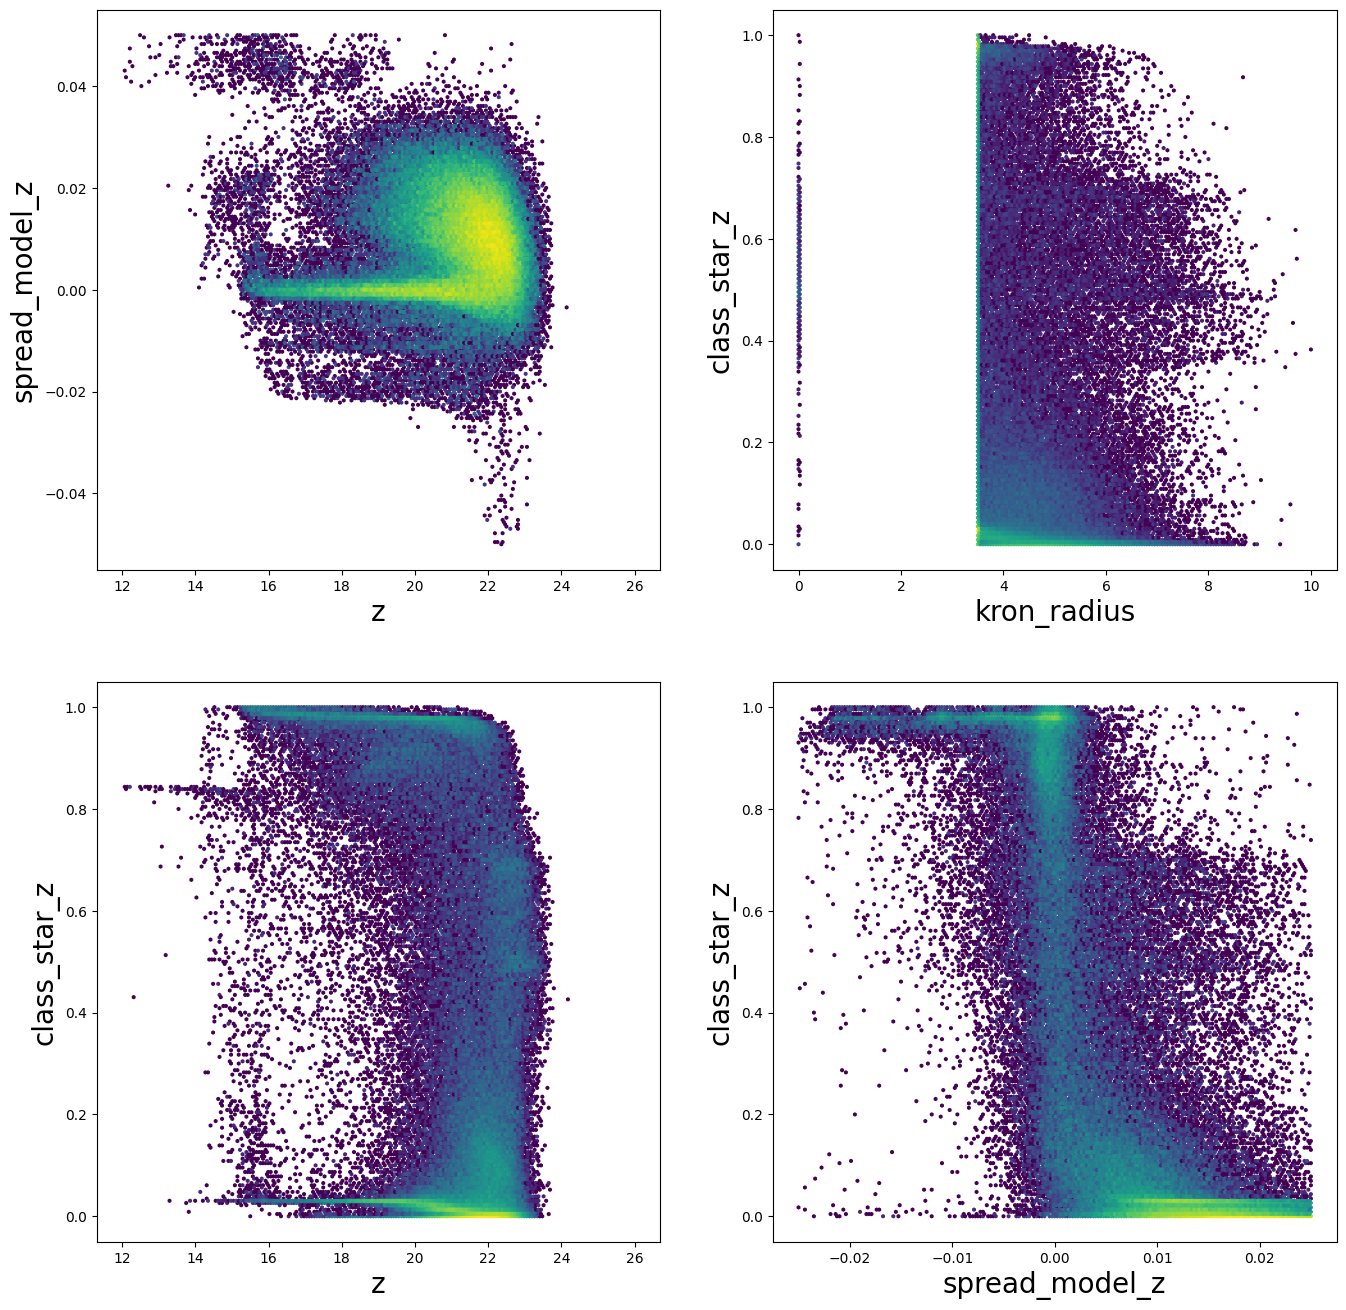

In [10]:
# Las magnitudes no válidas están configuradas en 99 -> mag_auto_X < 90
# spread_model_X es válido en abs(spread_model)<1
# Requiere S/N>5 en la banda z.
df_in = df[(df['gmag']<90) & (df['imag']<90) & (df['spread_model_z']>(-1)) & \
        (df['rmag']<90) & (df['zmag']<90) & (df['spread_model_z']<1) & \
        ((df['snr_z'])>5)]

print('Número de objetos con S/N > 5 y spread_model válido en la banda z:',len(df_in))

plot_morph(df_in,band='z')

Los gráficos anteriores son muy similares al equivalente en la banda *g* y *r*, excepto que las estructuras en forma de crestas a lo largo de los valores de `class_star` entre 0,3 y 0,7 son mucho menos prominentes que incluso en la banda *r*. La superposición entre los valores del `spread_model` para estrellas y galaxias también parece menos grave que para las bandas *g* y *r*.

### Combinando bandas

Arriba, el `spread_model` produce la mejor separación en la banda *z*, así como la menor cantidad de características de cresta en la distribución de `class_star`. Por otro lado, la banda *g* muestra la mayor superposición en los valores de `spread_model` en magnitudes débiles, y las crestas más llamativas en la distribución de `class_star`. Para fines de prueba, veamos qué sucede con los casos que tienen detecciones en las 3 bandas *g,r,z* y luego cuando la clasificación coincide entre las bandas.

A continuación, graficamos nuevamente el "peor" caso (banda *g*), pero requerimos que los objetos tengan S/N > 5 en todas las bandas *g,r,z*.

Número de objetos con S/N > 5 en bandas g, r, z y spread_model válido en g: 107858


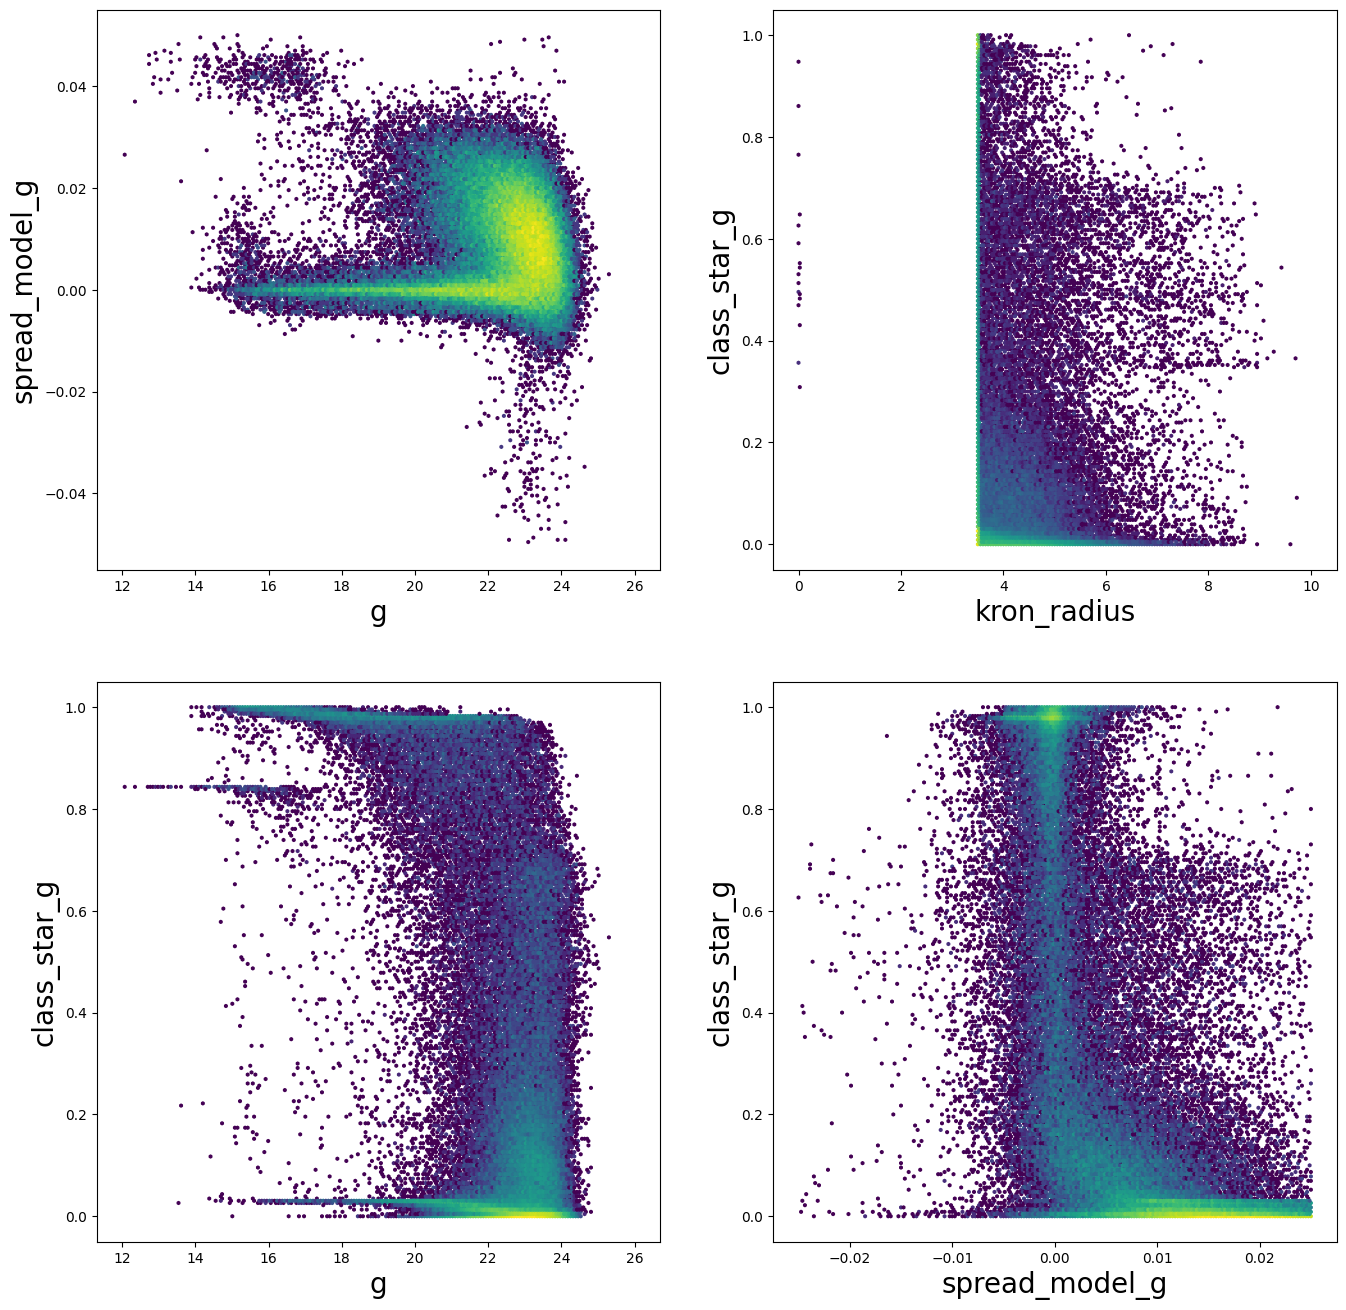

In [11]:
# Las magnitudes no válidas están configuradas en 99, pero al requerir S/N>5 solo se mantendrán las revistas válidas.
# spread_model_X es válido en abs(spread_model)<1
# Requiere S/N>5 en la banda g, r, z.
df_in=df[(df['spread_model_g']>(-1)) & (df['spread_model_g']<1) & \
      (df['snr_g']>5) & (df['snr_r']>5) & (df['snr_z']>5)]

print('Número de objetos con S/N > 5 en bandas g, r, z y spread_model válido en g:',len(df_in))

plot_morph(df_in,band='g')

La prueba anterior dio como resultado gráficos más limpios con menos crestas en el parámetro "class_star".

Ahora, probemos qué sucede en los casos en los que hay acuerdo o desacuerdo en el valor de `class_star` entre bandas. Vamos a definir categorías de la siguiente manera:

* **Galaxias (buenas)**: `class_star` < 0,5 en todas las bandas
* **Galaxias (malas)**: `class_star` < 0,5 en *g* pero no en *r* o *z*
* **Estrellas (buenas)**: `class_star` > 0,5 en todas las bandas
* **Estrellas (malas)**: `class_star` > 0,5 en *g* pero no en *r* o *z*

El recorte del 0,5 es algo arbitrario. La motivación principal es probar cómo se comportan las muestras si tienen una clasificación consistente entre las 3 bandas, versus una clasificación conflictiva entre la banda *g* y al menos de las otras dos bandas (*r* y/o *z*).

In [12]:
def plot_spread_mag(df_input,i,label=None,**kwargs):
    ax = fig.add_subplot(2,2,i+1)
    ax.hexbin(df_input['gmag'],df_input['spread_model_g'],gridsize=200,bins='log',mincnt=1,extent=(12,26,-0.05,0.05))
    ax.set_xlabel('g',fontsize=20)
    ax.set_ylabel('spread_model_g',fontsize=20)
    ax.tick_params(labelsize=10)
    if label is not None:
        ax.text(0.1,0.1,label,transform=ax.transAxes,fontsize=18,color='red',backgroundcolor='white')

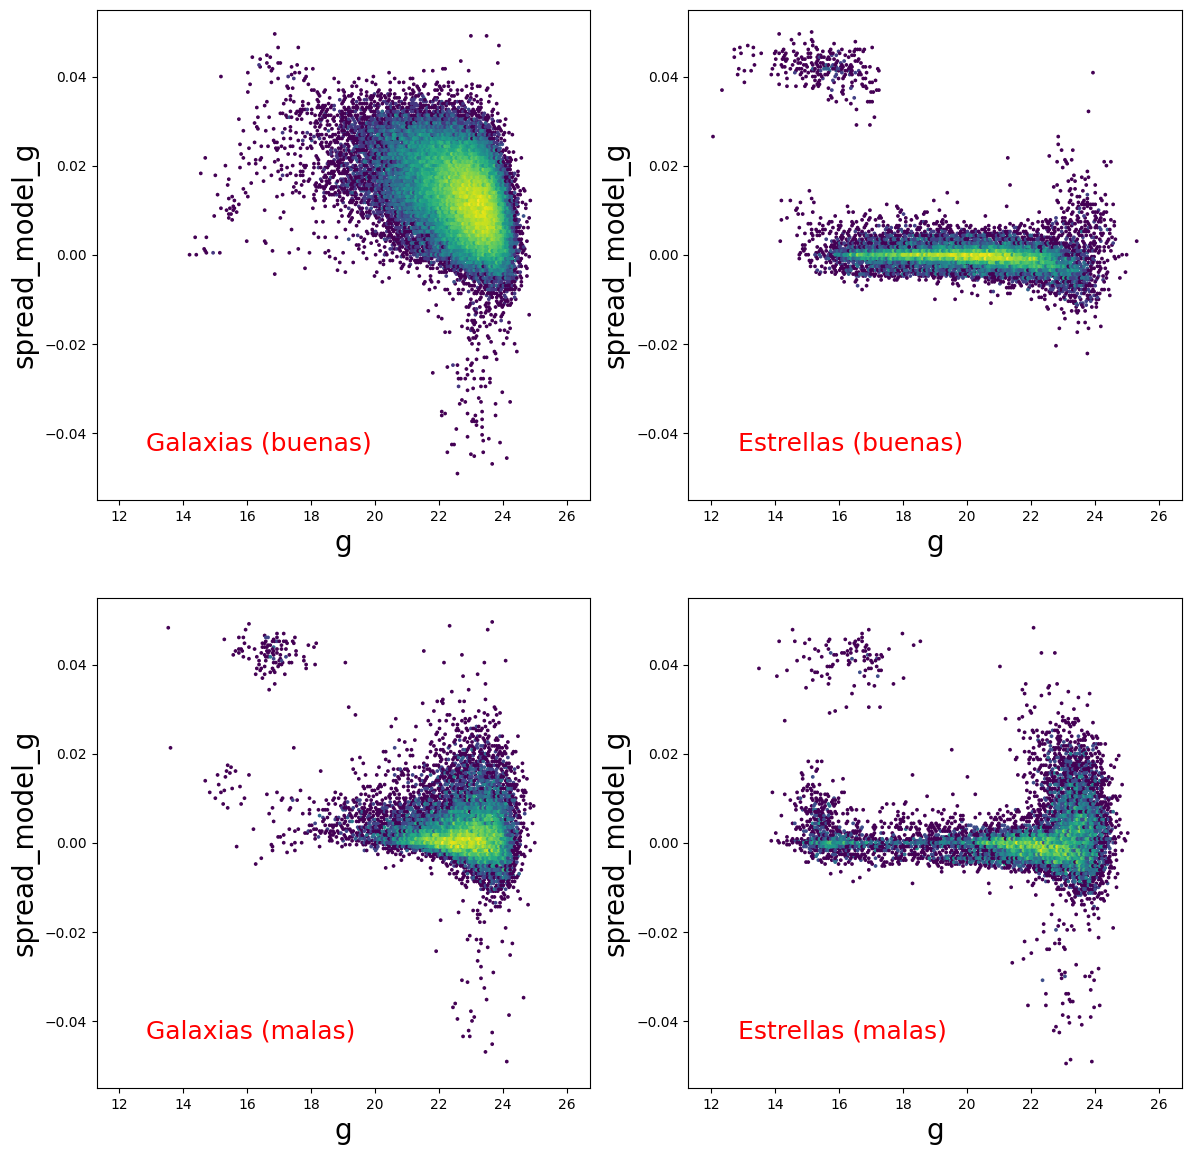

In [13]:
# Las magnitudes no válidas están configuradas en 99 -> mag_auto_X < 90
# spread_model_X es válido en abs(spread_model)<1
# Requiere S/N > 5 en la banda g, r, z.
df=df[(df['spread_model_g']>(-1)) & (df['spread_model_g']<1) & \
      (df['snr_g']>5) & (df['snr_r']>5) & (df['snr_z']>5)]

df_gal    = df[(df['class_star_g']<0.5) & (df['class_star_r']<0.5) & (df['class_star_z']<0.5)]
df_notok  = df[(df['class_star_g']<0.5) & ((df['class_star_r']>0.5) | (df['class_star_z']>0.5))]
df_star   = df[(df['class_star_g']>0.5) & (df['class_star_r']>0.5) & (df['class_star_z']>0.5)]
df_notok2 = df[(df['class_star_g']>0.5) & ((df['class_star_r']<0.5) | (df['class_star_z']<0.5))]

fig = plt.figure(figsize=(7*2,7*2))

plot_spread_mag(df_gal,0,label='Galaxias (buenas)')
plot_spread_mag(df_star,1,label='Estrellas (buenas)')
plot_spread_mag(df_notok,2,label='Galaxias (malas)')
plot_spread_mag(df_notok2,3,label='Estrellas (malas)')

# Descomente las siguientes 2 líneas para guardar un archivo PNG en el directorio de su notebook local
# archivo exterior = 'class_star_g_TESTS.png'
# fig.savefig(archivo de salida, bbox_inches='apretado')

Como se muestra en la fila superior, los objetos con clasificaciones consistentes entre bandas muestran la separación más limpia. La fila inferior muestra objetos con una clasificación conflictiva. Las galaxias de banda *g* con una clasificación conflictiva de bandas *r* y/o *z* tienden a tener un `spread_model` cercano a 0, como se espera para fuentes puntuales, pero con una gran dispersión en magnitudes débiles o tal vez uniéndose a una población real de galaxias. Las estrellas de banda *g* con una clasificación de banda *r* y/o *z* en conflicto se comportan como una mezcla de estrellas con `spread_model` cerca de 0 y una población claramente distinta que contribuye en *g*>23.

## Diagrama óptico color-color con nueva definición de muestra

Repetimos el gráfico color-color de la sección Resultados del gráfico, pero ahora dividido en las categorías definidas anteriormente:

* **Galaxias (buenas)**: `class_star` < 0,5 en todas las bandas
* **Galaxias (malas)**: `class_star` < 0,5 en *g* pero no en *r* o *z*
* **Estrellas (buenas)**: `class_star` > 0,5 en todas las bandas
* **Estrellas (malas)**: `class_star` > 0,5 en *g* pero no en *r* o *z*

In [14]:
def plot_grz(df_input,i,label=None,**kwargs):
    col0 = df_input['rmag'] - df_input['zmag']   # color rz
    col1 = df_input['gmag'] - df_input['rmag']   # color g-r
    
    # Histograma 2D de objetos
    ax = fig.add_subplot(2,2,i+1)
    ax.hexbin(col0, col1, bins='log', cmap=plt.cm.viridis, gridsize=140, 
               mincnt=1, extent=(-1., 3, -1., 3))
    ax.set_xlabel('r-z',fontsize=20)
    ax.set_ylabel('g-r',fontsize=20)

    if label is not None:
        ax.text(0.1,0.9,label,transform=ax.transAxes,fontsize=16,color='red',backgroundcolor='white')

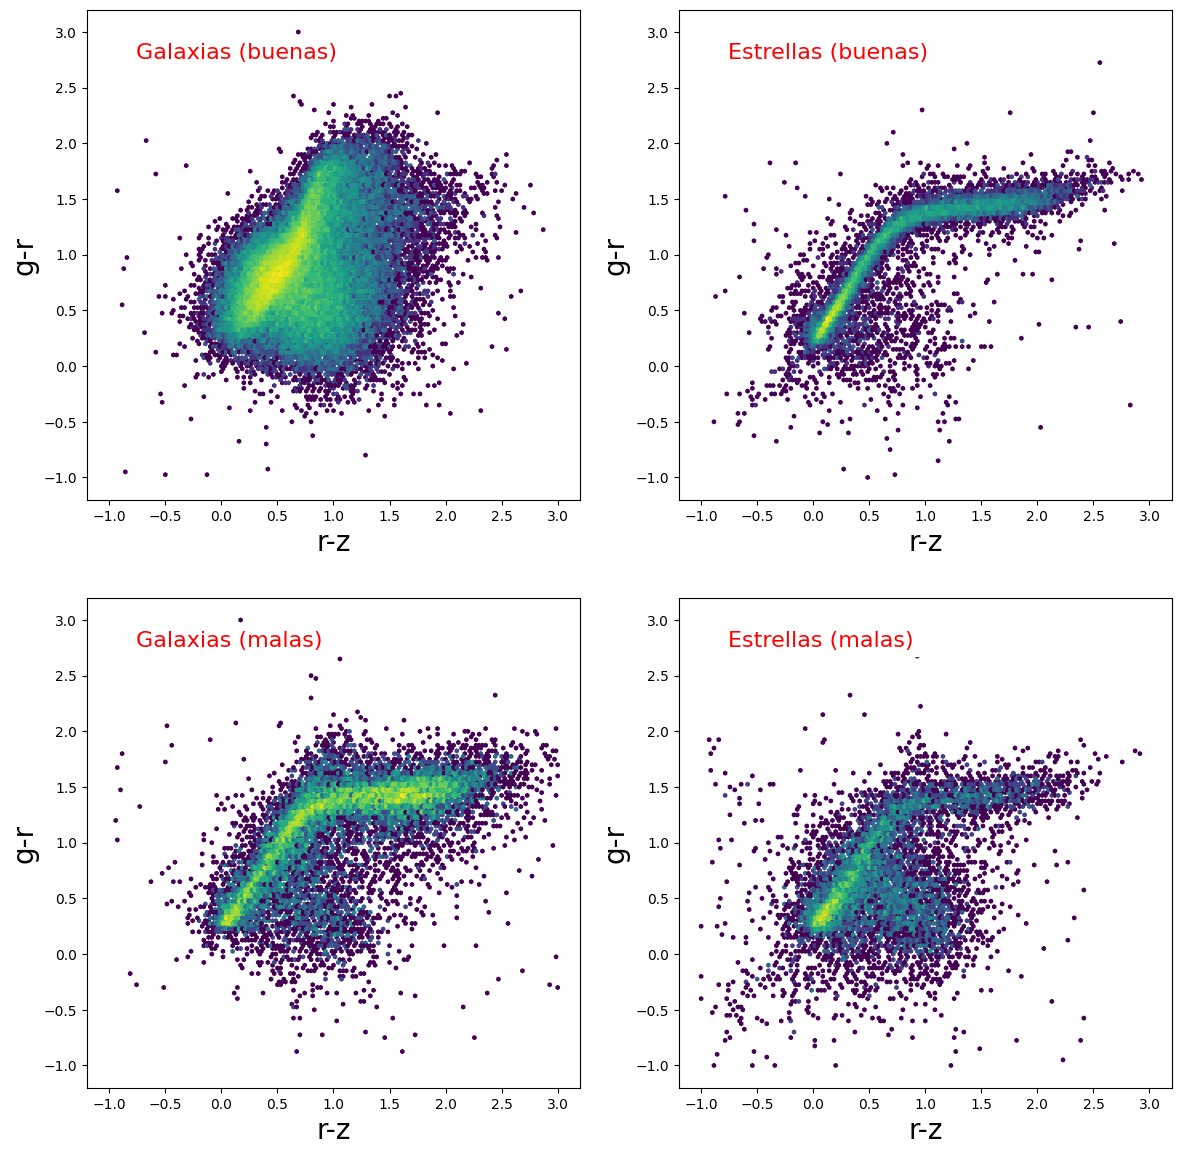

In [16]:
fig = plt.figure(figsize=(7*2,7*2))

plot_grz(df_gal,0,label='Galaxias (buenas)')
plot_grz(df_star,1,label='Estrellas (buenas)')
plot_grz(df_notok,2,label='Galaxias (malas)')
plot_grz(df_notok2,3,label='Estrellas (malas)')

# Descomente las siguientes 2 líneas para guardar un archivo PNG en el directorio de su notebook local
# archivo de salida = 'grz_DESDR1.png'
# fig.savefig(archivo de salida, bbox_inches='apretado')

La rama de la galaxia y el lugar estelar en el plano *g-r* vs. *r-z* son mucho más limpios. Sin embargo, no está claro qué sucede con los QSO. Podría ser que estén principalmente en la "nube" debajo de las ramas y más obvios en el panel etiquetado "Estrellas (malas)". Esto significa que se verían como una estrella en *g* pero no en *r* o *z*. En un *r-z* fijo, los QSO serían más azules que las estrellas en *g-r*. Se podría investigar con espectroscopia o plantillas para confirmar.

## Comparación con LS + SDSS

Como referencia, esta es una figura con fotometría LS (DECaLS) para clasificación espectral SDSS DR13 (objetos comparativamente brillantes).

<figura>
<img src="ls_sdss_starGalQso.jpg", align="centro", ancho=900>
<figcaption>Figura: Diagramas color-color de la fotometría DECaLS divididos por clases espectrales SDSS. Versión ligeramente modificada de la figura de Bela Abolfathi (UC Irvine). </figcaption>
</figura>

## DES DR1 con *g* < 22

Los gráficos de color-color se repiten para objetos **brillantes** (*g* < 22 mag) y nuevamente se dividen en las cuatro categorías definidas anteriormente.

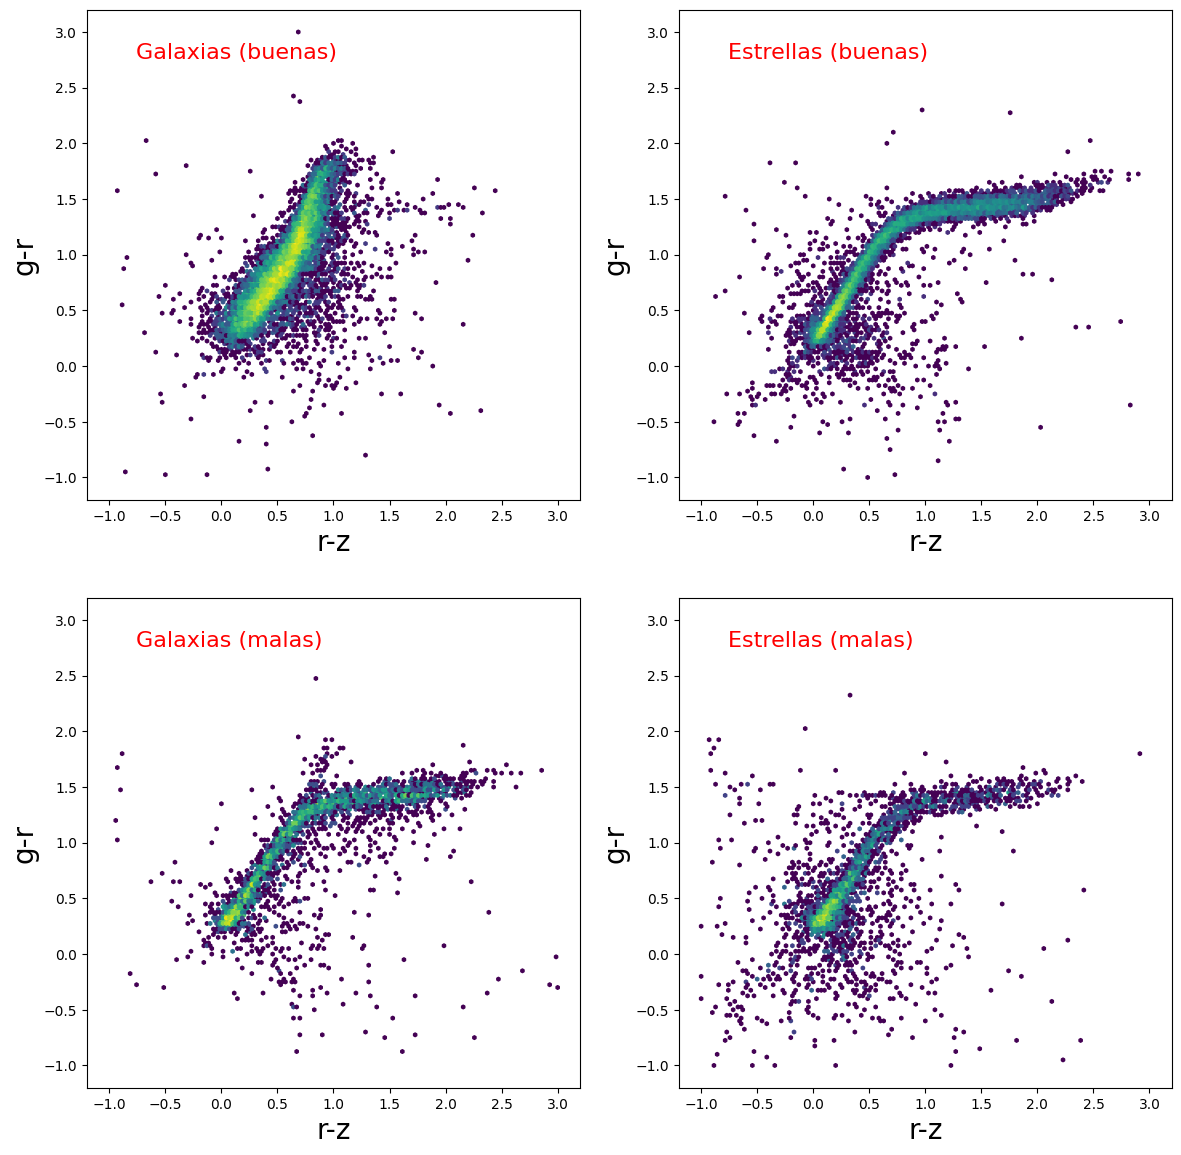

In [17]:
# Repita lo anterior con gmag < 22 como en SDSS/BOSS DR12Q

g22_gal    = df[(df['class_star_g']<0.5) & (df['class_star_r']<0.5) & (df['class_star_z']<0.5) & (df['gmag']<22.)]
g22_notok  = df[(df['class_star_g']<0.5) & ((df['class_star_r']>0.5) | (df['class_star_z']>0.5)) & (df['gmag']<22.)]
g22_star   = df[(df['class_star_g']>0.5) & (df['class_star_r']>0.5) & (df['class_star_z']>0.5) & (df['gmag']<22.)]
g22_notok2 = df[(df['class_star_g']>0.5) & ((df['class_star_r']<0.5) | (df['class_star_z']<0.5)) & (df['gmag']<22.)]

fig = plt.figure(figsize=(7*2,7*2))

plot_grz(g22_gal,0,label='Galaxias (buenas)')
plot_grz(g22_star,1,label='Estrellas (buenas)')
plot_grz(g22_notok,2,label='Galaxias (malas)')
plot_grz(g22_notok2,3,label='Estrellas (malas)')

# Descomente las siguientes 2 líneas para guardar un archivo PNG en el directorio de su notebook local
# archivo de salida = 'grz_DESDR1_gLT22.png'
# fig.savefig(archivo de salida, bbox_inches='apretado')

Las galaxias y estrellas con clasificaciones consistentes siguen ramas estrechas con dispersión limitada. Curiosamente, las galaxias de banda *g* con una clasificación conflictiva (malas) siguen el mismo lugar que las estrellas buenas. Esto indica que la clasificación de las bandas *r* y *z* como estrella es más apropiada cuando hay un conflicto en *g* < 22. Dado que las estrellas de la banda *g* con una clasificación conflictiva también siguen el lugar geométrico de las estrellas buenas, una afirmación más general sería que los objetos con una clasificación conflictiva de magnitud brillante (*g* < 22) probablemente sean estrellas.

## DES DR1 con *g*>23

Los gráficos de color-color se repiten para objetos **débiles** (*g* > 23 mag) y nuevamente se dividen en las cuatro categorías definidas anteriormente.

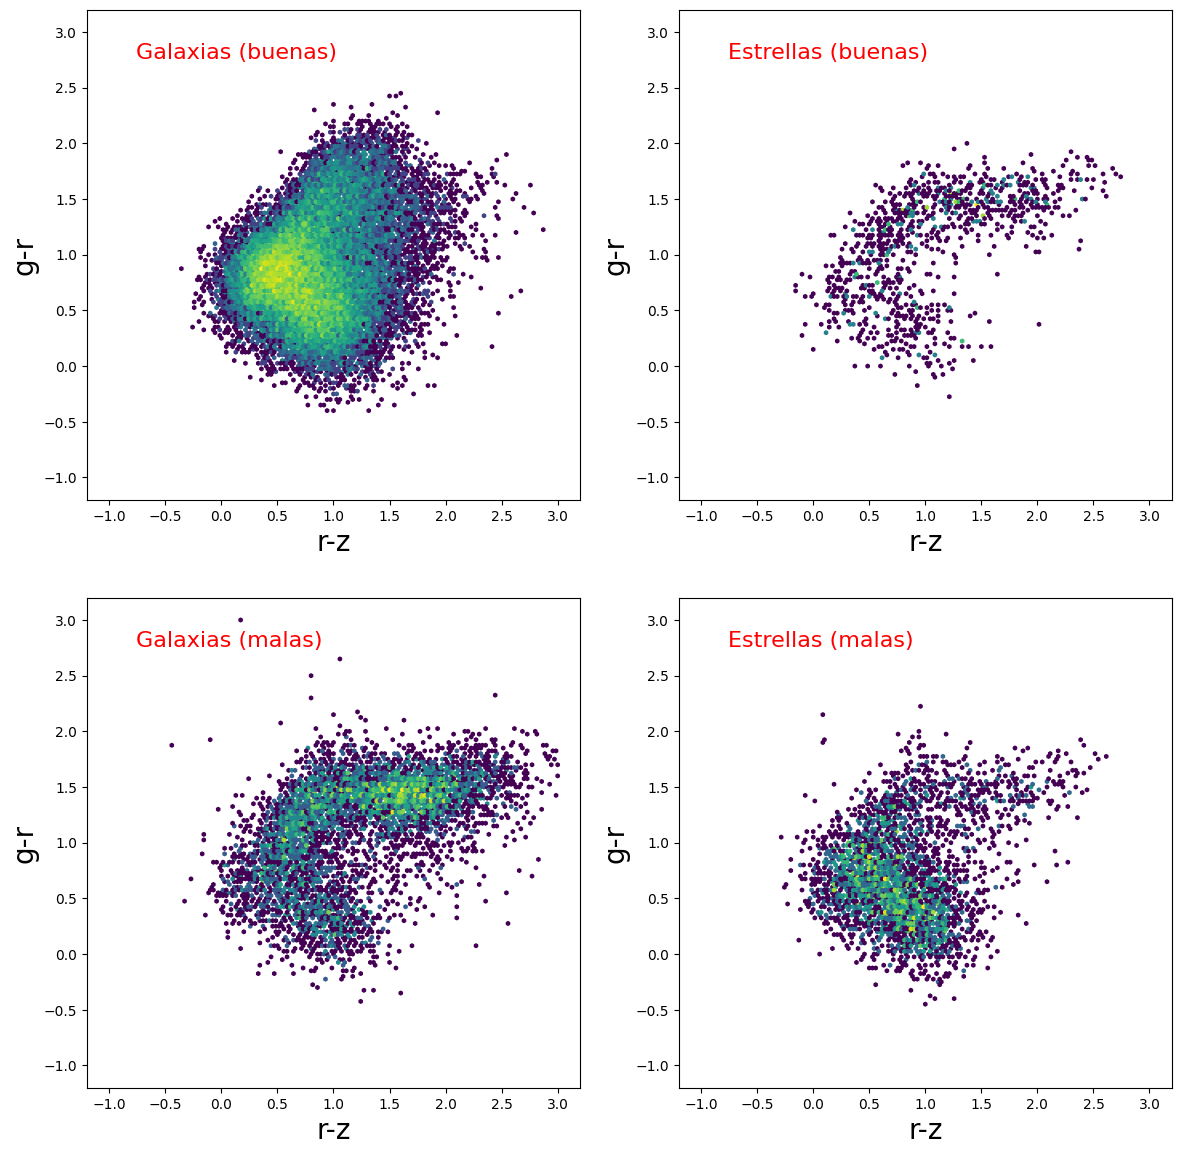

In [18]:
# Repita lo anterior con gmag > 23 (1 mag más débil que SDSS/BOSS DR12Q)

g23_gal    = df[(df['class_star_g']<0.5) & (df['class_star_r']<0.5) & (df['class_star_z']<0.5) & (df['gmag']>23.)]
g23_notok  = df[(df['class_star_g']<0.5) & ((df['class_star_r']>0.5) | (df['class_star_z']>0.5)) & (df['gmag']>23.)]
g23_star   = df[(df['class_star_g']>0.5) & (df['class_star_r']>0.5) & (df['class_star_z']>0.5) & (df['gmag']>23.)]
g23_notok2 = df[(df['class_star_g']>0.5) & ((df['class_star_r']<0.5) | (df['class_star_z']<0.5)) & (df['gmag']>23.)]

fig = plt.figure(figsize=(7*2,7*2))

plot_grz(g23_gal,0,label='Galaxias (buenas)')
plot_grz(g23_star,1,label='Estrellas (buenas)')
plot_grz(g23_notok,2,label='Galaxias (malas)')
plot_grz(g23_notok2,3,label='Estrellas (malas)')

# Descomente las siguientes 2 líneas para guardar un archivo PNG en el directorio de su notebook local
# archivo de salida = 'grz_DESDR1_gGT23.png'
# fig.savefig(archivo de salida, bbox_inches='apretado')

En el gráfico anterior, el lugar estelar es ancho y curvo de una manera que se superpone con las galaxias, y con una forma muy similar entre las estrellas buenas y las galaxias malas. La mayor dispersión y superposición hacen que el uso de estos colores para la identificación de objetos sea más difícil en comparación con la situación de los objetos brillantes. Una investigación más profunda podría ayudar a identificar la naturaleza real de los objetos que se muestran arriba. Una posibilidad sería incorporar la fotometría infrarroja de WISE.

<a class="anchor" id="compare"></a>
# Apéndice: comparación con la clasificación del DES Team

Esta sección incluye notas sobre una posible clasificación estrella-galaxia del equipo DES. Consulte el [documento DES DR1](https://ui.adsabs.harvard.edu/abs/2018ApJS..239...18A) para obtener la definición más reciente. Podría resultar interesante hacer una comparación directa con las categorías anteriores.

**des_dr1.main** es la tabla que se usaría en Data Lab.

Estrellas:

    WHERE
    ( (CASE WHEN spread_model_i + 3. * spreaderr_model_i > 0.005 THEN 1 ELSE 0 END) +
    (CASE WHEN spread_model_i + 1. * spreaderr_model_i > 0.003 THEN 1 ELSE 0 END) +
    (CASE WHEN spread_model_i - 1. * spreaderr_model_i > 0.003 THEN 1 ELSE 0 END) ) <= 1
    AND spread_model_i BETWEEN -0.05 AND 0.05
    AND imaflags_iso_i = 0
    AND flags_i < 4

Galaxias:

    WHERE
    ( (CASE WHEN spread_model_i + 3. * spreaderr_model_i > 0.005 THEN 1 ELSE 0 END) +
    (CASE WHEN spread_model_i + 1. * spreaderr_model_i > 0.003 THEN 1 ELSE 0 END) +
    (CASE WHEN spread_model_i - 1. * spreaderr_model_i > 0.003 THEN 1 ELSE 0 END) ) = 3
    AND spread_model_i BETWEEN -0.05 AND 0.05
    AND imaflags_iso_i = 0
    AND flags_i < 4
    AND mag_auto_i < 23

Tenga en cuenta que si utiliza otras bandas como *g* y *r*, es posible que también deba solicitar:

    imaflags_iso_g = 0
    imaflags_iso_r = 0
    flags_g < 4
    flags_r < 4

Los cortes exactos podrían adaptarse ligeramente dependiendo del compromiso deseado entre pureza versus integridad en la selección de la muestra.

<a class="anchor" id="classstar"></a>
# Apéndice: comparación `class_star`

Comparamos, para las 4 categorías definidas anteriormente, los valores de `class_star` entre las bandas *g* y *r*, y entre las bandas *g* y *z*. Los casos con clasificaciones consistentes en las 3 bandas solo deberían tener puntos en el cuadrante correspondiente (<0,5 para galaxias o >0,5 para estrellas). Dado que las clasificaciones "malas" inconsistentes significan un conflicto con la clasificación *r* **y/o** la clasificación *z*, las distribuciones se distribuirán en dos cuadrantes en estos casos.

In [19]:
def plot_class_star_gr(df_input,i,label=None,**kwargs):
    ax = fig.add_subplot(2,4,i+1)
    ax.hexbin(df_input['class_star_r'],df_input['class_star_g'],gridsize=200,bins='log',mincnt=1,extent=(0,1,0,1.2))
    ax.set_xlabel('clase_star_r',fontsize=10)
    ax.set_ylabel('clase_estrella_g',fontsize=10)
    ax.tick_params(labelsize=10)
    if label is not None:
        ax.text(0.1,0.9,label,transform=ax.transAxes,fontsize=16,color='red',backgroundcolor='white')

In [20]:
def plot_class_star_gz(df_input,i,label=None,**kwargs):
    ax = fig.add_subplot(2,4,i+1)
    ax.hexbin(df_input['class_star_z'],df_input['class_star_g'],gridsize=200,bins='log',mincnt=1,extent=(0,1,0,1.2))
    ax.set_xlabel('clase_star_z',fontsize=10)
    ax.set_ylabel('clase_estrella_g',fontsize=10)
    ax.tick_params(labelsize=10)
    if label is not None:
        ax.text(0.1,0.9,label,transform=ax.transAxes,fontsize=16,color='red',backgroundcolor='white')

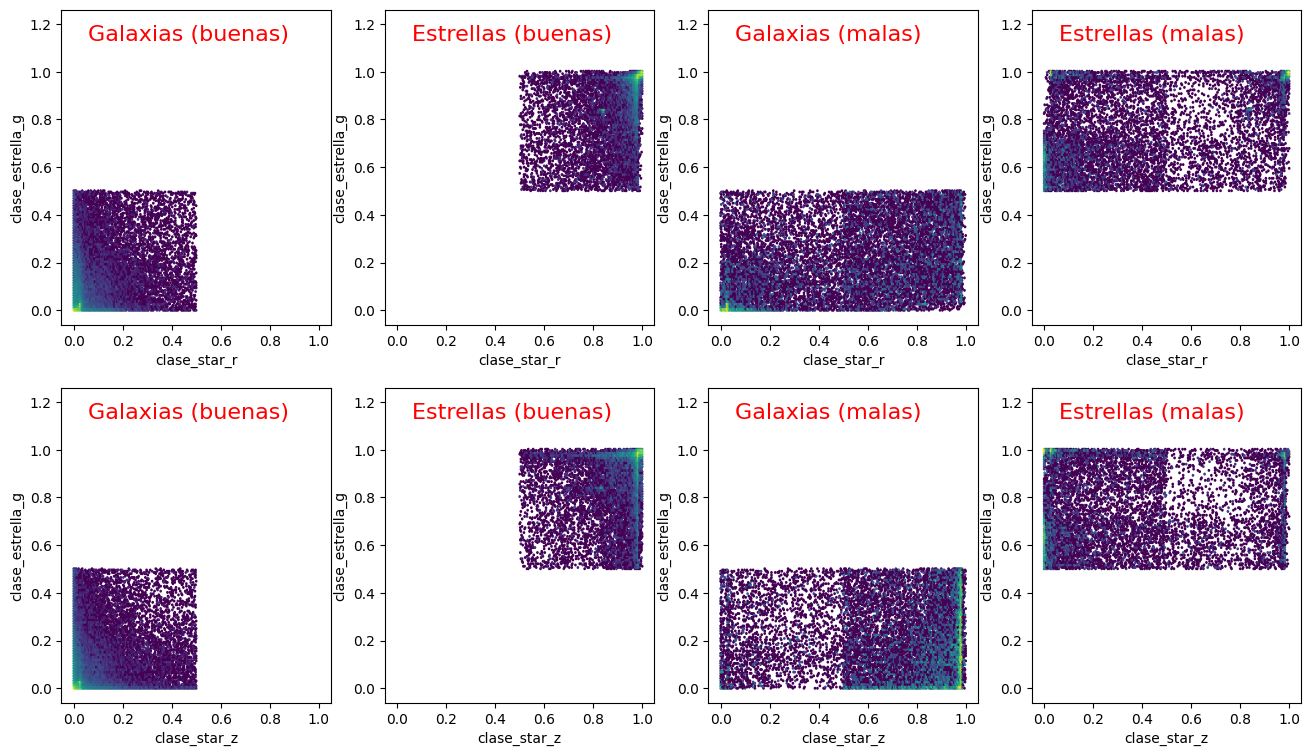

In [22]:
fig = plt.figure(figsize=(4*4,4.5*2))

plot_class_star_gr(df_gal,0,label='Galaxias (buenas)')
plot_class_star_gr(df_star,1,label='Estrellas (buenas)')
plot_class_star_gr(df_notok,2,label='Galaxias (malas)')
plot_class_star_gr(df_notok2,3,label='Estrellas (malas)')

plot_class_star_gz(df_gal,4,label='Galaxias (buenas)')
plot_class_star_gz(df_star,5,label='Estrellas (buenas)')
plot_class_star_gz(df_notok,6,label='Galaxias (malas)')
plot_class_star_gz(df_notok2,7,label='Estrellas (malas)')

# Descomente las siguientes 2 líneas para guardar un archivo PNG en el directorio de su notebook local
# archivo exterior = 'class_star_g_COMPARE.png'
# fig.savefig(archivo de salida, bbox_inches='apretado')

<a class="anchor" id="resources"></a>
# Referencias

[Colaboración DES (2018)](https://ui.adsabs.harvard.edu/abs/2018ApJS..239...18A)

[Soumagnac et al (2015)](http://adsabs.harvard.edu/abs/2015MNRAS.450..666S)

[Desai et al (2012)](http://adsabs.harvard.edu/abs/2012ApJ...757...83D)